In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# data=pd.read_csv('/content/drive/MyDrive/Cloud Project/water_potability.csv')
data=pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.shape

(3276, 10)

In [4]:
data['ph'].unique()
data['Sulfate'].unique()
data['Trihalomethanes'].unique()

array([86.99097046, 56.32907628, 66.42009251, ..., 69.84540029,
       77.4882131 , 78.69844633])

In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
# mean_value=data['ph'].mean()
# data['ph'].fillna(value=mean_value, inplace=True)

In [8]:
# mean_value=data['Sulfate'].mean()
# data['Sulfate'].fillna(value=mean_value, inplace=True)

In [9]:
# mean_value=data['Trihalomethanes'].mean()
# data['Trihalomethanes'].fillna(value=mean_value, inplace=True)

In [10]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


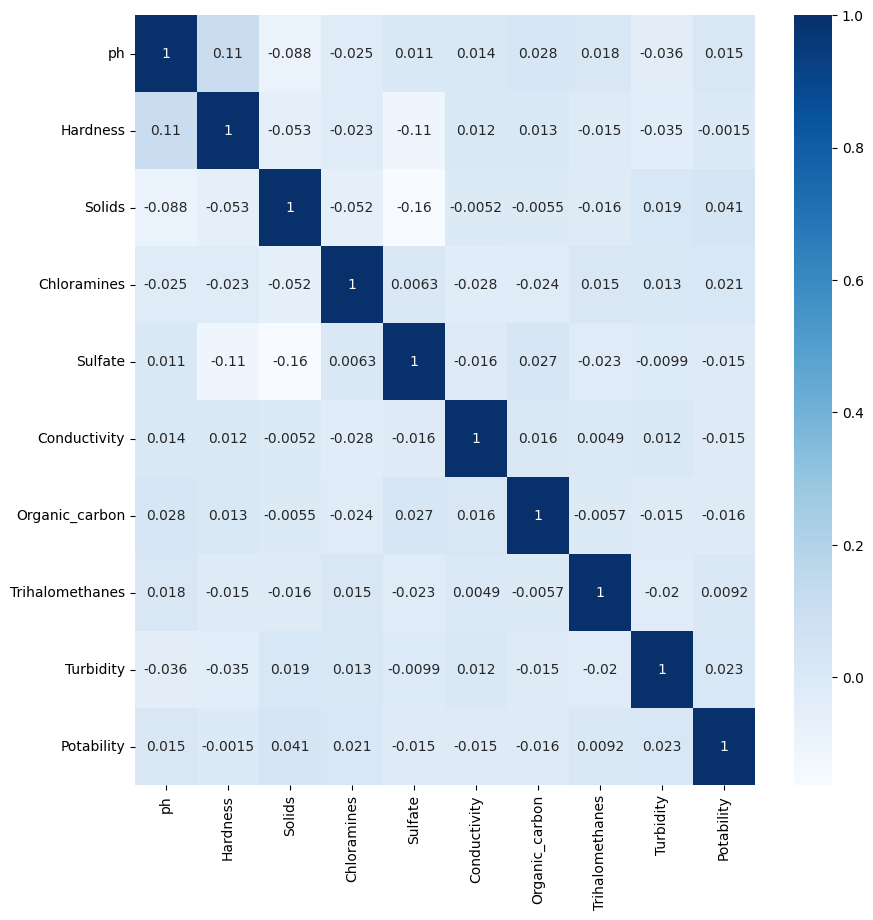

In [11]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [12]:
print(data['ph'].max() , data['ph'].min())
print(data['Hardness'].max() , data['Hardness'].min() )
print(data['Solids'].max() , data['Solids'].min())
print(data['Chloramines'].max() , data['Chloramines'].min())
print(data['Sulfate'].max() , data['Sulfate'].min())
print(data['Conductivity'].max() ,data['Conductivity'].min())
print(data['Organic_carbon'].max() , data['Organic_carbon'].min())
print(data['Trihalomethanes'].max() ,data['Trihalomethanes'].min())
print(data['Turbidity'].max() ,data['Turbidity'].min())


13.999999999999998 0.2274990502021987
317.33812405558257 73.4922336890611
56488.67241273919 320.942611274359
13.127000000000002 1.3908709048851806
481.0306423059972 129.00000000000003
753.3426195583046 201.6197367551575
27.00670661116601 2.1999999999999886
124.0 8.577012932983806
6.494748555990993 1.45


In [13]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:
zero  = data[data['Potability']==0]   #zero values in Potability column
one = data[data['Potability']==1]  
from sklearn.utils import resample
#minority class that  is 1, we need to upsample/increase that class so that there is no bias
#n_samples = 1998 means we want 1998 sample of class 1, since there are 1998 samples of class 0
df_minority_upsampled = resample(one, replace = True, n_samples = 1200) 
#concatenate
data= pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
data = shuffle(data)

<AxesSubplot:xlabel='Potability', ylabel='count'>

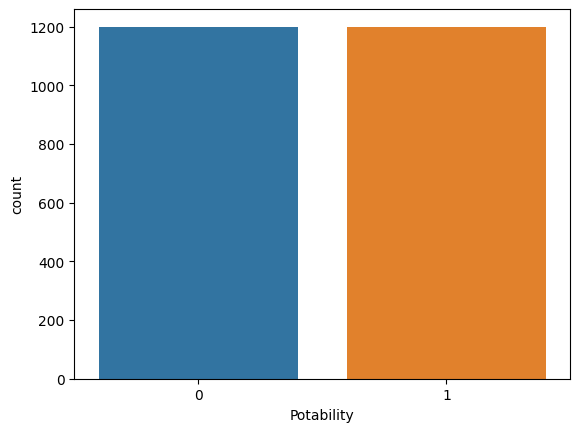

In [15]:
sns.countplot(x=data['Potability'])  
# The value remains equal as we resampled the data in previous step

In [16]:
data.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.047941
Trihalomethanes    0.036976
Sulfate            0.036269
Chloramines        0.034086
Hardness           0.024449
ph                 0.012240
Conductivity       0.005780
Turbidity          0.004134
Organic_carbon     0.000861
Name: Potability, dtype: float64

In [17]:
X = data.drop('Potability', axis=1)
y = data['Potability']

In [18]:
X = round(X, 2)

In [19]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
153,4.80,180.77,13556.73,8.98,322.06,587.40,12.40,62.03,4.42
1902,6.41,183.87,20526.31,8.45,366.18,548.64,13.45,69.05,4.53
2125,6.09,208.91,21456.60,9.60,263.45,459.02,19.30,31.01,4.52
2895,13.35,152.78,18464.90,6.72,334.86,450.85,17.19,85.88,2.53
2457,6.73,197.44,26012.49,6.95,346.63,473.33,18.44,69.47,4.16
...,...,...,...,...,...,...,...,...,...
3270,6.07,186.66,26138.78,7.75,345.70,415.89,12.07,60.42,3.67
1080,7.60,214.68,11459.62,11.00,398.92,321.07,12.01,58.10,3.58
208,10.03,224.27,14962.18,7.43,336.97,517.51,18.86,65.36,4.18
448,8.08,174.16,12677.84,7.30,333.58,589.55,14.85,39.53,3.61


In [20]:
data.value_counts()

ph         Hardness    Solids        Chloramines  Sulfate     Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability
7.110845   213.886337  25043.532803  6.048437     245.954253  505.735535    16.383140       91.681026        5.712792   1             6
6.746935   154.332162  25137.427677  8.495904     274.884089  330.083723    15.983632       69.943254        3.485536   1             6
7.146976   196.562685  16911.203773  6.890505     320.100875  520.111358    12.854239       66.814176        4.025762   1             6
5.772770   186.060603  26693.761607  5.808580     333.073364  312.869364    12.376272       32.761161        4.154685   1             6
7.741245   218.237186  22824.699465  8.696479     363.992748  521.016261    15.310631       73.723070        3.741143   1             5
                                                                                                                                     ..
6.565634   159.729363  19044.680071  6.693214     283

In [21]:
data.Potability.value_counts()

0    1200
1    1200
Name: Potability, dtype: int64

In [22]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# features= X.columns
# X[features] = sc.fit_transform(X[features])

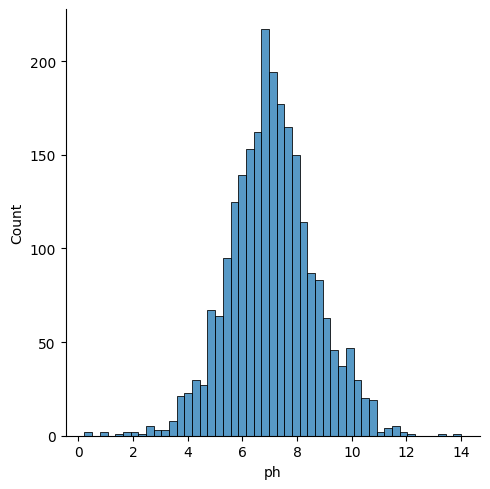

In [23]:
sns.displot(data['ph'])

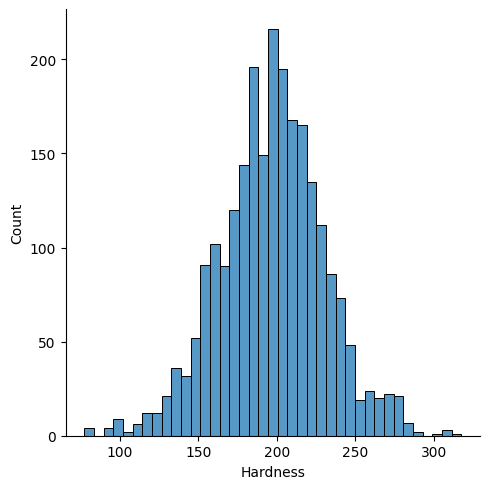

In [24]:
sns.displot(data['Hardness'])

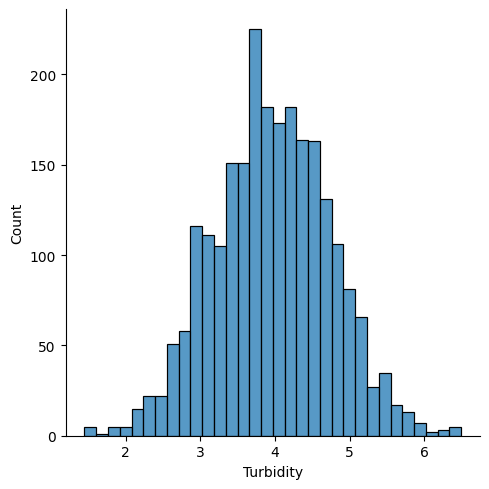

In [25]:
sns.displot(data['Turbidity'])

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
rf = RandomForestClassifier()
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)
grid_rf.fit(X_train.values, y_train.values)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 100}


In [28]:
rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, random_state=100)

In [29]:
from sklearn.metrics import accuracy_score ,confusion_matrix , classification_report , r2_score

rf.fit(X_train.values, y_train.values)    
   
y_pred = rf.predict(X_test.values)
accuracy = accuracy_score(y_test,y_pred)

print(accuracy)

0.81875


In [31]:
rf.predict([[0,0,0,0,0,0,0,0,0]])

array([0], dtype=int64)

In [32]:
# True Positive , True Negative.....
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[196  36]
 [ 51 197]]


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       232
           1       0.85      0.79      0.82       248

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480



In [70]:
print(r2_score(y_test,y_pred))

0.24994791304951736


In [71]:
#Saving the trained model

In [72]:
import pickle
import sklearn

In [73]:
filename='trained_final.pkl'
pickle.dump(rf,open(filename,'wb'))

In [74]:
#loading the saved model
sklearn.__version__ = '1.2.2'

In [75]:
loaded_model = pickle.load(open('trained_final.pkl','rb'))


In [76]:
# input_data =(7.7,200.22,17000.234343,7.72345,356.434345,500.32545,10.343434,100.324343,3.5353434)
# input_data =(7.423088,210.046197,31073.03133,6.374709, 312.103161, 460.894212, 16.805990, 41.607907 ,3.712682)
# input_data =(11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264	)
input_data =(7.754884, 210.720769 ,18857.058497, 5.693752 ,376.484622 ,375.672691 ,14.708599 ,43.299820 ,5.128390)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print("The water is not suitable for drinking")
else:
  print("The water is suitable for drinking")

[1]
The water is suitable for drinking


In [ ]:
# input_data =(7.7,200.22,17000.234343,7.72345,356.434345,500.32545,10.343434,100.324343,3.5353434)
input_data =(7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print("The water is not suitable for drinking")
else:
  print("The water is suitable for drinking")

[0]
The water is not suitable for drinking


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
lst=loaded_model.predict_proba([[7.710960,181.938126,6552.626314,5.389249,390.596392,516.284083,17.010785,58.241734,4.288947]])[0]
lst=lst.tolist()
index=max(lst)
prediction = lst.index(index)
print(prediction)
if prediction==0:
  print("Not Suitable")
else:
  print("Suitable")

0
Not Suitable


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
